In [432]:
import pandas as pd
import sqlite3
import contextlib 

In [433]:
sql_connect = sqlite3.connect('../database.sqlite')
cursor = sql_connect.cursor()

Alle tabellen inladen en analyseren

In [434]:
tables = pd.read_sql("""SELECT *
                     FROM sqlite_master
                     WHERE type='table';
                     """, sql_connect)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


***Beschikbare Tabellen***

- Country
- League
- Match
- Team
- Team_Attributes
- Player
- Player_Attributes

In [435]:
countries = pd.read_sql("""SELECT *
                        FROM Country;
                        """, sql_connect)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [436]:
leagues = pd.read_sql("""SELECT *
                      FROM League
                      JOIN Country
                      USING (id);
                      """, sql_connect)
leagues

,id,country_id,name,name
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In dit tabel koppelen wij de waardes de country tabel aan die van de leagues op basis van hun id. Hierdoor kunnen wij zien uit welk land de league afkomstig is.

Wij focussen ons hier op de "England Premier League" omdat deze uit Engeland komt en Manchester United een engelse club is.

In [437]:
matches = pd.read_sql("""SELECT *
                      FROM Match;
                      """, sql_connect)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [438]:
teams = pd.read_sql("""SELECT *
                    FROM Team;
                    """, sql_connect)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [439]:
team_attributes = pd.read_sql("""SELECT * 
                              FROM Team as t
                              JOIN Team_Attributes as ta  
                              USING (team_api_id);""", sql_connect)
team_attributes.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,2010-02-22 00:00:00,60,Balanced,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,2014-09-19 00:00:00,52,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,2015-09-10 00:00:00,47,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,2010-02-22 00:00:00,70,Fast,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,2011-02-22 00:00:00,47,Balanced,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [440]:
players = pd.read_sql("""SELECT *
                      FROM Player
                      ;""", sql_connect)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [441]:
player_attributes = pd.read_sql("""SELECT * 
                              FROM Player as p
                              JOIN Player_Attributes as pa
                              USING (player_api_id, player_fifa_api_id )
                              LIMIT 5;""", sql_connect)
player_attributes

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,2016-02-18 00:00:00,67,...,54,48,65,69,69,6,11,10,8,8
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,2015-11-19 00:00:00,67,...,54,48,65,69,69,6,11,10,8,8
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,2015-09-21 00:00:00,62,...,54,48,65,66,69,6,11,10,8,8
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,2015-03-20 00:00:00,61,...,53,47,62,63,66,5,10,9,7,7
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,2007-02-22 00:00:00,61,...,53,47,62,63,66,5,10,9,7,7


![alt text](image-1).png

![mooi plaatje.png](<attachment:mooi plaatje.png>)
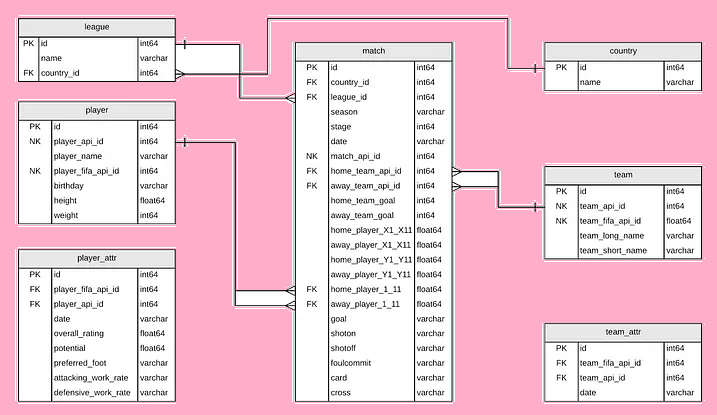

Belangrijkste indentifiers Manchester United

Analyseren seizoen 2012/2013

In [442]:
all_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        ht.team_long_name AS  home_team,
                                        at.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS ht on ht.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team at on at.team_api_id = Match.away_team_api_id                              
                                ORDER by date;""", sql_connect)
all_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0
...,...,...,...,...,...,...,...,...,...,...
25974,25945,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Basel,Grasshopper Club Zürich,0,1
25975,25946,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,Lugano,FC St. Gallen,3,0
25976,25947,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Luzern,FC Sion,2,2
25977,25948,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Thun,BSC Young Boys,0,3


In [456]:
def select_season(country_name, season, df=all_matches):
    """_summary_

    Parameters
    ----------
    df : DataFrame, optional
        A dataframe which you want to use for the sorting
    country_name : str
        _description_
    season : str
        _description_

    Returns
    -------
    DataFrame
        
    """    
    global chosen_season
    chosen_season = season

    global chosen_country_name
    chosen_country_name = country_name
    
    result = df[(df["country_name"] == country_name) & (df["season"] == season)]
    return result

season_matches = select_season(country_name='England', season='2008/2009')
season_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
58,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
59,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
60,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
61,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
62,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
...,...,...,...,...,...,...,...,...,...,...
3258,2044,England,England Premier League,2008/2009,38,2009-05-24 00:00:00,Manchester City,Bolton Wanderers,1,0
3259,2045,England,England Premier League,2008/2009,38,2009-05-24 00:00:00,Blackburn Rovers,West Bromwich Albion,0,0
3260,2046,England,England Premier League,2008/2009,38,2009-05-24 00:00:00,Fulham,Everton,0,2
3261,2047,England,England Premier League,2008/2009,38,2009-05-24 00:00:00,Hull City,Manchester United,0,1


In [457]:
def decide_winner(team1_goals, team2_goals):
    """This function can be used to show which team won the match and which one lost

    Parameters
    ----------
    team1_goals : int
        the amount of goals scored by the first team
    team2_goals : int
        the amount of goals scored by the second team

    Returns
    -------
    String
        A string is returned to show whether team1 won or lost
    """    
    if team1_goals > team2_goals:
        return 'Win'
    elif team1_goals == team2_goals:
        return 'Draw'
    else:
        return 'Loss'

In [458]:
all_matches_goals = season_matches[["home_team", "away_team", "home_team_goal", "away_team_goal"]]
all_matches_goals

,home_team,away_team,home_team_goal,away_team_goal
58,Arsenal,West Bromwich Albion,1,0
59,Sunderland,Liverpool,0,1
60,West Ham United,Wigan Athletic,2,1
61,Everton,Blackburn Rovers,2,3
62,Middlesbrough,Tottenham Hotspur,2,1
...,...,...,...,...
3258,Manchester City,Bolton Wanderers,1,0
3259,Blackburn Rovers,West Bromwich Albion,0,0
3260,Fulham,Everton,0,2
3261,Hull City,Manchester United,0,1


In [459]:
# Meer variabelen? nieuwe kolomnamen zouden hier ook bij kunnen, maar is niet per se nuttig

def season_results(df):
    """_summary_

    Parameters
    ----------
    df : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """    
    result_hometeam = []
    result_awayteam = []

    for index, col in df.iterrows():
        goals_thuis = col['home_team_goal']
        goals_uit = col['away_team_goal']
        
        result_hometeam.append(decide_winner(goals_thuis, goals_uit))
        result_awayteam.append(decide_winner(goals_uit, goals_thuis))

    season_results_df = pd.DataFrame({
        'Thuisteam': df['home_team'],
        'Uitteam': df['away_team'],
        'Thuisteam_doelpunten': df['home_team_goal'],
        'Uitteam_doelpunten': df['away_team_goal'],
        'Uitkomst_thuisteam': result_hometeam,
        'Uitkomst_uitteam': result_awayteam
    })

    return season_results_df

all_matches_results = season_results(all_matches_goals)
all_matches_results

,Thuisteam,Uitteam,Thuisteam_doelpunten,Uitteam_doelpunten,Uitkomst_thuisteam,Uitkomst_uitteam
58,Arsenal,West Bromwich Albion,1,0,Win,Loss
59,Sunderland,Liverpool,0,1,Loss,Win
60,West Ham United,Wigan Athletic,2,1,Win,Loss
61,Everton,Blackburn Rovers,2,3,Loss,Win
62,Middlesbrough,Tottenham Hotspur,2,1,Win,Loss
...,...,...,...,...,...,...
3258,Manchester City,Bolton Wanderers,1,0,Win,Loss
3259,Blackburn Rovers,West Bromwich Albion,0,0,Draw,Draw
3260,Fulham,Everton,0,2,Loss,Win
3261,Hull City,Manchester United,0,1,Loss,Win


In [460]:
# Home team wins & points

def calc_points(df, name_col, count_col):
    """A function to calcutale how often each team scored and subsequently used that information to calculate the points they get for those wins / losses

    Parameters
    ----------
    df : DataFrame
        A dataframe which you want to use for the calculation
    name_col : str
        The column you want to use as filter for the calcutation, the new dataframe is grouped by this column
    count_col : str
        the column of wich you wish to count the values and base the new column's score on

    Returns
    -------
    DataFrame
        A new dataframe is returned which shows the wins, draws, losses and total points per value of the name_col
    """    

    count_score = df.groupby(name_col)[count_col].value_counts()
    calc_points_df = pd.DataFrame(count_score).unstack(count_col).fillna(0)['count'][['Win', 'Draw', 'Loss']]

    calc_points_df['Total Points'] = calc_points_df['Win'] * 3 + calc_points_df['Draw'] * 1

    calc_points_df = calc_points_df.sort_values('Total Points', ascending=False) 

    return calc_points_df

In [461]:
hometeam_points = calc_points(all_matches_results, 'Thuisteam', 'Uitkomst_thuisteam')

hometeam_points.head()

Uitkomst_thuisteam,Win,Draw,Loss,Total Points
Thuisteam,,,,
Manchester United,16.0,2.0,1.0,50.0
Liverpool,12.0,7.0,0.0,43.0
Chelsea,11.0,6.0,2.0,39.0
Manchester City,13.0,0.0,6.0,39.0
Arsenal,11.0,5.0,3.0,38.0


In [462]:
awayteam_points = calc_points(all_matches_results, 'Uitteam', 'Uitkomst_uitteam')

awayteam_points.head()

Uitkomst_uitteam,Win,Draw,Loss,Total Points
Uitteam,,,,
Chelsea,14,2,3,44
Liverpool,13,4,2,43
Manchester United,12,4,3,40
Arsenal,9,7,3,34
Everton,9,6,4,33


In [463]:
total_team_points = (hometeam_points + awayteam_points).sort_values('Total Points', ascending=False).rename_axis('Team')

total_team_points.columns.name = None

total_team_points


,Win,Draw,Loss,Total Points
Team,,,,
Manchester United,28.0,6.0,4.0,90.0
Liverpool,25.0,11.0,2.0,86.0
Chelsea,25.0,8.0,5.0,83.0
Arsenal,20.0,12.0,6.0,72.0
Everton,17.0,12.0,9.0,63.0
Aston Villa,17.0,11.0,10.0,62.0
Fulham,14.0,11.0,13.0,53.0
Tottenham Hotspur,14.0,9.0,15.0,51.0
West Ham United,14.0,9.0,15.0,51.0


In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

In [465]:
def plot_decorator(func):
    def wrapper(*args, **kwargs):
        sns.set_theme(palette='colorblind', style='darkgrid')
        result = func(*args, **kwargs)
        plt.show()        
        return result
    return wrapper

@plot_decorator
def create_plot(df, type, x_axis, y_axis):
    """_summary_

    Parameters
    ----------
    df : DataFrame
        _description_
    type : str
        _description_
    x_axis : str
        _description_
    y_axis : str
        _description_

    Returns
    -------
    _type_
        _description_
    """    
    plot = sns.catplot(
        data=df,
        kind=type,
        x=x_axis,
        y=y_axis,
        aspect=1.25
    )

    plt.title(f'Points scored per team in the {chosen_season} season in {chosen_country_name}.')
    return plot

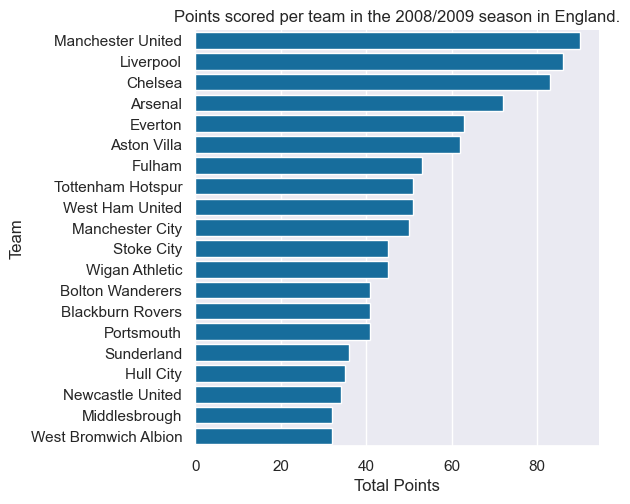

In [466]:
all_matches_plot = create_plot(df=total_team_points, 
                          type='bar', 
                          x_axis='Total Points', 
                          y_axis='Team')